In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

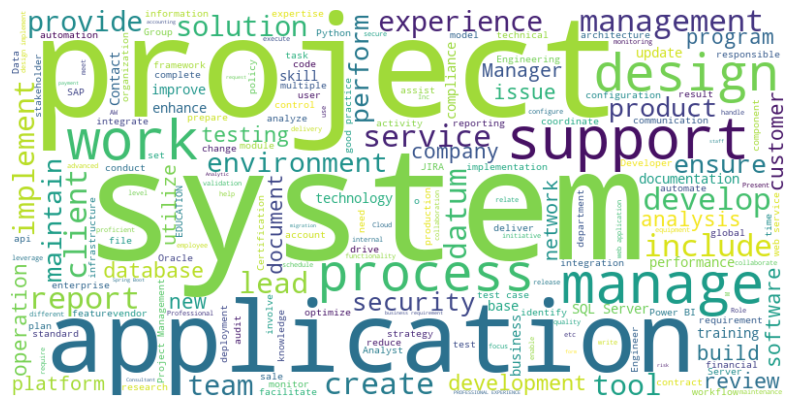

In [3]:
df = pd.read_csv('cleaned_resumes.csv')
text = ''.join(df['cleaned_resume'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('word_cloud.jpg')
plt.show()

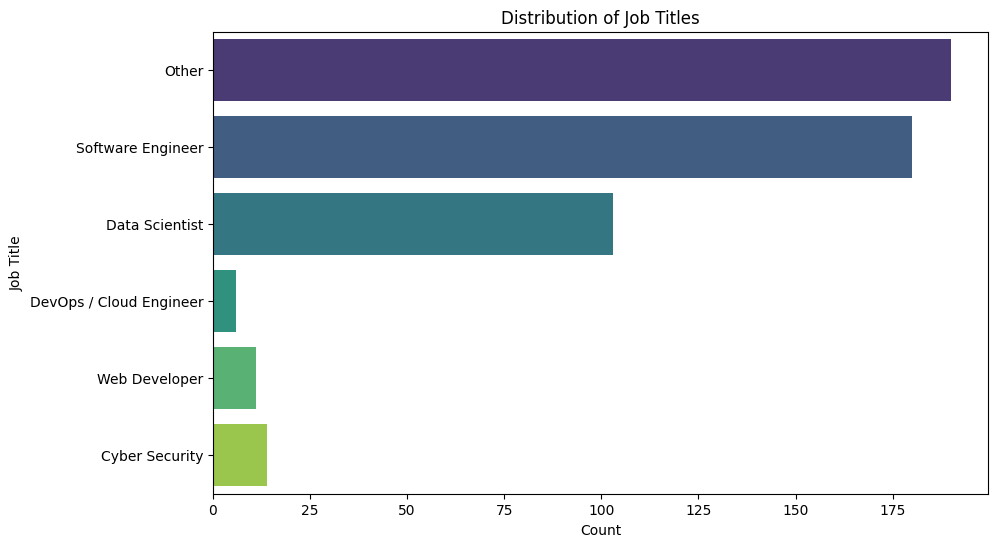

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='job_category', hue='job_category', palette="viridis", legend=False)
plt.title('Distribution of Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.savefig('job_titles.jpg')
plt.show()

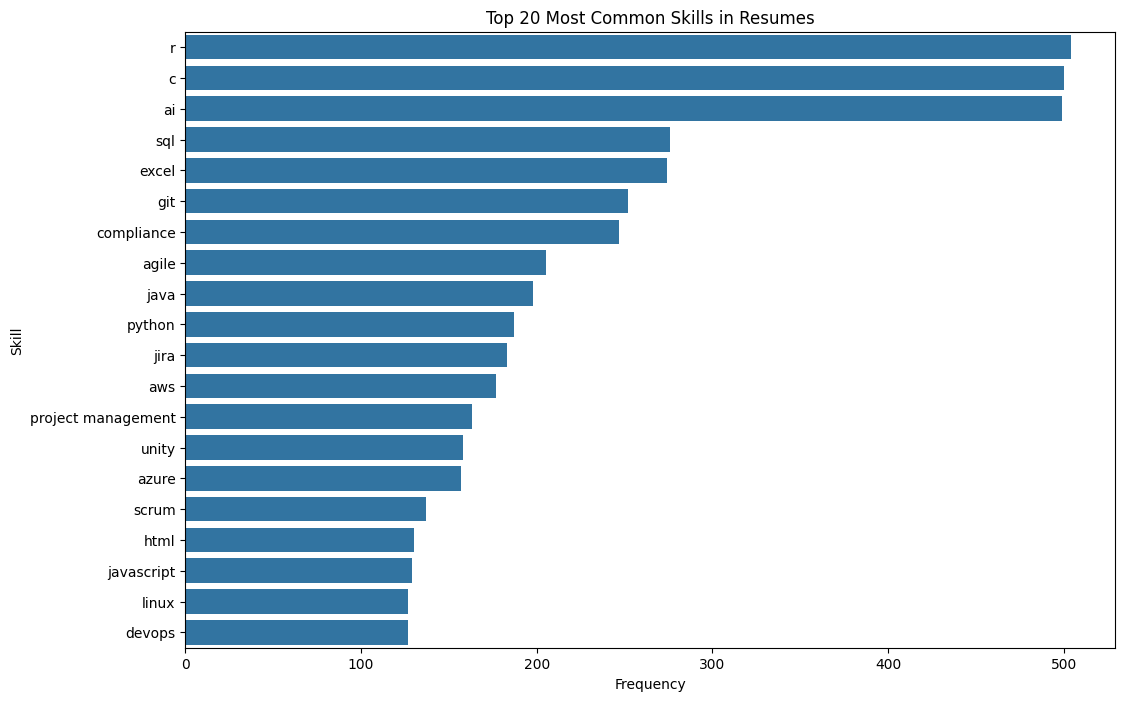

In [5]:
skills_list = [
    'python', 'java', 'sql', 'javascript', 'react', 'angular', 'machine learning', 'data analysis', 'excel', 'c++', 
    'html', 'css', 'node.js', 'express', 'django', 'flask', 'tensorflow', 'keras', 'pytorch', 'scikit-learn', 'apache spark',
    'aws', 'azure', 'gcp', 'docker', 'kubernetes', 'linux', 'git', 'jira', 'gitlab', 'mongodb', 'mysql', 'postgresql',
    'redis', 'html5', 'sass', 'webpack', 'graphql', 'typescript', 'flutter', 'swift', 'objective-c', 'ruby', 'ruby on rails', 
    'php', 'laravel', 'flutter', 'react native', 'vue.js', 'bash', 'vagrant', 'devops', 'ci/cd', 'apache kafka', 'nosql', 'hadoop',
    'cloud computing', 'ai', 'data visualization', 'power bi', 'tableau', 'matplotlib', 'seaborn', 'big data', 'pandas', 'numpy',
    'deep learning', 'neural networks', 'data mining', 'etl', 'r', 'd3.js', 'aws lambda', 'azure devops', 'kotlin', 'swift',
    'java spring', 'django rest framework', 'c#', 'dotnet', 'unity', 'game development', 'react.js', 'mongoDB', 'postman', 'rest api',
    'oauth', 'firebase', 'google analytics', 'linux administration', 'network security', 'firewalls', 'vpn', 'penetration testing',
    'cybersecurity', 'information security', 'cryptography', 'ethical hacking', 'incident response', 'security operations',
    'risk management', 'vulnerability assessment', 'red team', 'blue team', 'compliance', 'iso 27001', 'gdpr', 'docker-compose',
    'distributed systems', 'microservices', 'web scraping', 'seo', 'agile', 'scrum', 'project management', 'ux/ui', 'jupyter notebook',
    'api development', 'flutter', 'android', 'ios', 'cloud architecture', 'virtualization', 'aiops', 'iot', 'chatbots', 'artificial intelligence',
    'business intelligence', 'powerapps', 'salesforce', 'mongodb atlas', 'elasticsearch', 'solr', 'google cloud storage', 'apache hadoop',
    'spark streaming', 'graph databases', 'neo4j', 'etl pipelines', 'data engineering', 'cloud security', 'saas', 'paas', 'iaas', 'docker swarm',
    'big data analytics', 'ux research', 'ux design', 'figma', 'sketch', 'photoshop', 'illustrator', 'figma', 'adobe xd', 'user testing', 
    'usability testing', 'mobile app development', 'c++', 'c', 'vhdl', 'verilog', 'fpga', 'gpu', 'mlops', 'data lake', 'cloud computing',
    'k8s', 'jenkins', 'vscode', 'sublime', 'jetbrains', 'netbeans', 'rpa', 'power automate', 'autonomous systems', 'quantum computing',
    'edge computing', 'digital twins', 'ai ethics', 'chatbot development', 'nlp', 'machine vision', 'speech recognition', 'text analytics', 'mlflow',
    'keras', 'fastapi', 'google cloud', 'node', 'tensorflowjs', 'pycaret', 'openai', 'pythorch', 'deep reinforcement learning'
]
def extract_skills(resume,skills):
    return [skill for skill in skills if skill.lower() in resume.lower()]
df['extracted_skills'] = df['cleaned_resume'].apply(lambda x : extract_skills(x,skills_list))
skill_counts = {}
for skills in df['extracted_skills']:
    for skill in skills:
        if skill in skill_counts:
            skill_counts[skill] += 1
        else:
            skill_counts[skill] = 1
skill_df = pd.DataFrame(list(skill_counts.items()),columns=['Skill','Count'])
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Skill', data=skill_df.sort_values(by='Count', ascending=False).head(20))  # Top 20 skills
plt.title('Top 20 Most Common Skills in Resumes')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.savefig('most_common_skills.jpg')
plt.show()

In [6]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException


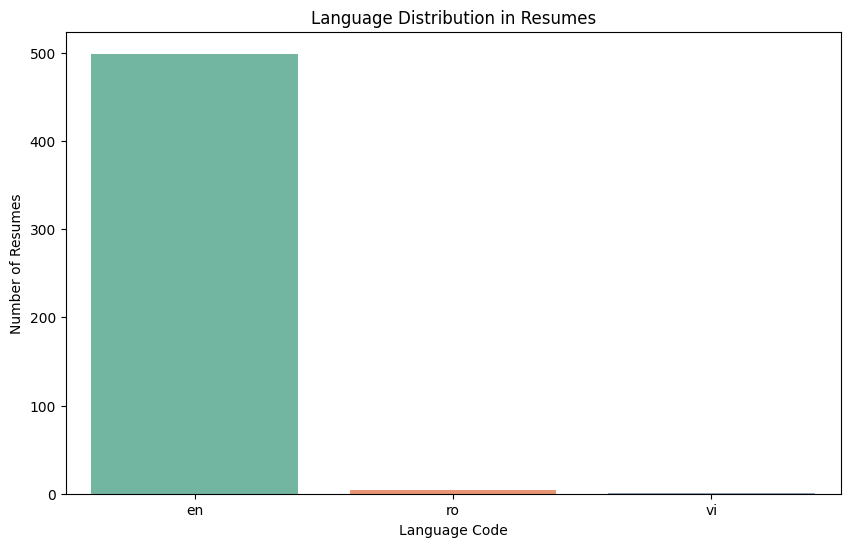

In [7]:
def get_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

df['language'] = df['cleaned_resume'].apply(get_language)

# View language distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='language', data=df, hue='language', order=df['language'].value_counts().index, palette='Set2', legend=False)
plt.title('Language Distribution in Resumes')
plt.xlabel('Language Code')
plt.ylabel('Number of Resumes')
plt.savefig('language_detection.jpg')
plt.show()

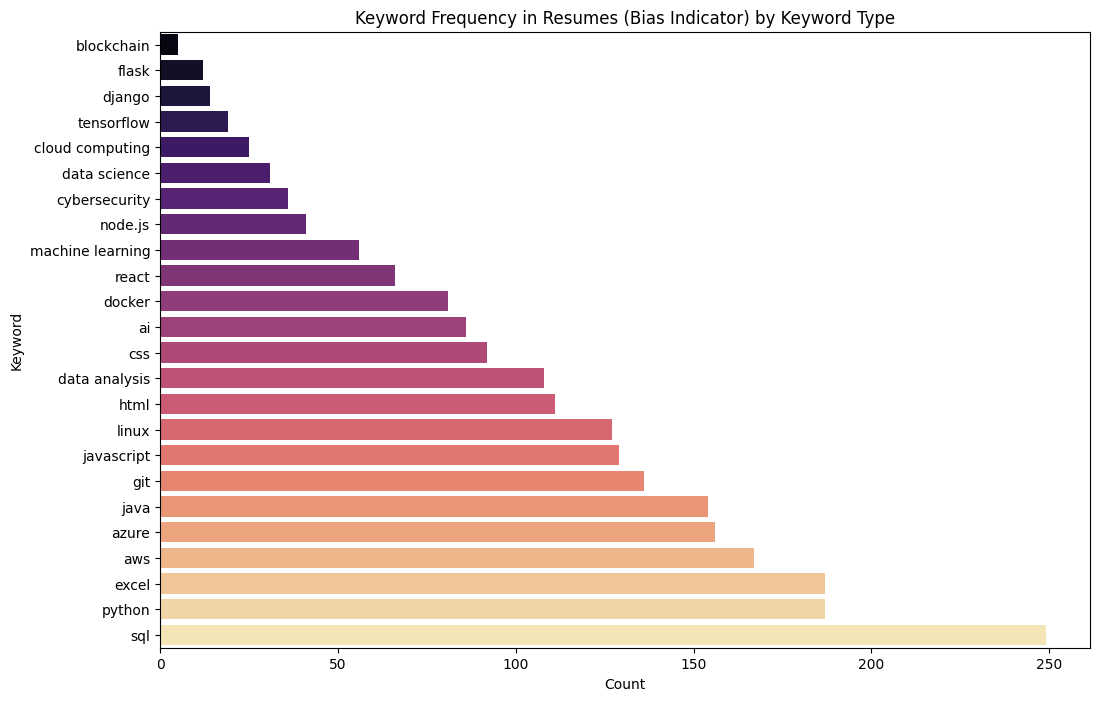

In [11]:
skill_list = [
    'python', 'java', 'sql', 'javascript', 'react', 'machine learning', 
    'data analysis', 'excel', 'html', 'css', 'node.js', 'django', 
    'flask', 'tensorflow', 'aws', 'azure', 'docker', 'git', 'linux', 'cybersecurity', 
    'data science', 'cloud computing', 'ai', 'blockchain'
]
keyword_counts = {kw: df['resume'].str.contains(r'\b' + re.escape(kw.lower()) + r'\b', case=False, na=False).sum() for kw in skill_list}

keyword_df = pd.DataFrame(keyword_counts.items(),columns=['Keyword','Count'])
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Keyword', data=keyword_df.sort_values(by='Count', ascending=True), 
            palette='magma', hue='Keyword', dodge=False)
plt.title('Keyword Frequency in Resumes (Bias Indicator) by Keyword Type')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.savefig('keyword_bias.jpg')
plt.show()